In [4]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)
(60000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train[0]

5

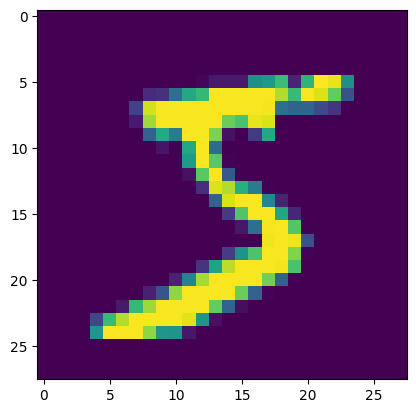

In [11]:
plt.imshow(X_train[0])

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [13]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 210s 112ms/step - loss: 0.2672 - accuracy: 0.9481 - val_loss: 0.0978 - val_accuracy: 0.9717
Epoch 2/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0937 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0827 - val_accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 221s 118ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.1095 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 224s 119ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.1097 - val_accuracy: 0.9778


In [19]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10965380817651749, 0.9778000116348267]


In [20]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 93ms/step
[[6.41076954e-14 1.25787277e-18 6.20276183e-12 1.24583297e-12
  1.96598193e-21 1.31410213e-18 8.73277794e-23 1.00000000e+00
  1.49896274e-12 1.31455064e-11]
 [4.20245533e-10 1.00211374e-10 9.99993682e-01 1.24810779e-13
  1.67064255e-14 1.10606795e-17 6.36666891e-06 2.49861459e-19
  4.70799684e-11 2.50944099e-16]
 [5.93362902e-12 9.99987245e-01 1.07609706e-10 1.95984440e-12
  2.63291838e-07 1.58970434e-10 7.33425094e-13 2.24960276e-11
  1.24585131e-05 1.04250133e-11]
 [1.00000000e+00 8.56806603e-20 1.39965537e-14 4.10306598e-17
  1.96119850e-18 1.84308030e-16 3.10625900e-11 9.89481866e-15
  4.06711374e-14 1.25948853e-14]]


In [21]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
model.save("models/mnistCNN.h5")